# Celem projektu jest analiza danych dotyczących udaru mózgu, znajdujących się w pliku healthcare-dataset-stroke-data.csv

### Etapy: 

1. Czyszczenie danych (usuwanie/inputacja braków danych, naprawa błędów, transformacje danych, rozwiązanie problemu wartości odstających)

2. Eksploracyjna analiza danych

3. Zamodelowanie zmiennej stroke na podstawie pozostałych zmiennych. Minimum 3 modele.

4. Ewaluacja na zbiorze testowym (wybór modelu i metryk z uzasadnieniem)


In [1]:
import pandas as pd

## Odczyt danych

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Objaśnienie kolumn

1. ID - identyfikator pacjenta
2. gender - płeć
3. age - wiek
4. hypertension - nadciśnienie (0 - nie, 1 - tak)
5. heart_disease - choroba serca (0 - nie, 1 - tak)
6. ever_married - kiedykolwiek w związku małżeńskim (0 - nie, 1 - tak)
7. work_type - rodzaj pracy ('Private' - sektor prywatny; 'Self-employed' - samozatrudnienie; 'Govt_job' - sektor publiczny; 'children' - dzieci do lat 16; 'Never_worked' - nigdy nie zatrudniony)
8. Residence_type - miejsce zamieszkania ('Urban' - miasto; 'Rural' - wieś)
9. avg_glucose_level - średni poziom glukozy
10. BMI
11. smoking_status - status palacza ('formerly smoked' - palący w przeszłości; 'never smoked' - nigdy nie palący; 'smokes' - palący; 'Unknown' - nieznany)
12. stroke - przebyty udar (0 - nie, 1 - tak)

## Czyszczenie danych & EDA

In [4]:
# Eliminacja redundantnej kolumny "ID"

df = df.drop(columns='id')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Na podstawie powyższych wyników można zaobserwować braki danych w kolumnie "BMI".

In [6]:
# Wyświetlenie unikalnych wartości kategorycznych z kolumn

print(df.gender.unique(), df.hypertension.unique(), df.heart_disease.unique(), df.ever_married.unique(), df.work_type.unique(), df.Residence_type.unique(), df.smoking_status.unique(), df.stroke.unique())

['Male' 'Female' 'Other'] [0 1] [1 0] ['Yes' 'No'] ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] ['Urban' 'Rural'] ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] [1 0]


Należy zakodować wartości kategorycznych. Jedną z możliwości jest zastosowanie metody One Hot Encoder.

In [7]:
# Kodowanie danych kategorycznych

from category_encoders.woe import WOEEncoder
woe_encoder = WOEEncoder()
df_woe = woe_encoder.fit_transform(X=df, 
                                     y=df['stroke'])


Zastosowano metodę imputacji braków danych za pomocą KNN.

In [8]:
df_woe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.050411,67.0,0,1,0.312055,0.045467,0.067883,228.69,36.6,0.522223,1
1,-0.036692,61.0,0,0,0.312055,0.526895,-0.074751,202.21,NaN,-0.022390,1
2,0.050411,80.0,0,1,0.312055,0.045467,-0.074751,105.92,32.5,-0.022390,1
3,-0.036692,49.0,0,0,0.312055,0.045467,0.067883,171.23,34.4,0.107755,1
4,-0.036692,79.0,1,0,0.312055,0.526895,-0.074751,174.12,24.0,-0.022390,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.036692,80.0,1,0,0.312055,0.045467,0.067883,83.75,NaN,-0.022390,0
5106,-0.036692,81.0,0,0,0.312055,0.526895,0.067883,125.20,40.0,-0.022390,0
5107,-0.036692,35.0,0,0,0.312055,0.526895,-0.074751,82.99,30.6,-0.022390,0
5108,0.050411,51.0,0,0,0.312055,0.045467,-0.074751,166.29,25.6,0.522223,0


In [9]:
from sklearn.impute import KNNImputer

In [10]:
# # Utworzenie obiektu KNN Imputera

# imputer = KNNImputer()
# imputer.fit(df_ord)

# # Przypisanie do ramki danych

# df_ord[:] = imputer.transform(df_ord)
# df_ord


# Utworzenie obiektu KNN Imputera

imputer = KNNImputer()
imputer.fit(df_woe)

# Przypisanie do ramki danych

df_woe[:] = imputer.transform(df_woe)
df_woe

C:\Users\almak\AppData\Local\Temp\ipykernel_12912\2381671477.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_woe[:] = imputer.transform(df_woe)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.050411,67.0,0.0,1.0,0.312055,0.045467,0.067883,228.69,36.60,0.522223,1.0
1,-0.036692,61.0,0.0,0.0,0.312055,0.526895,-0.074751,202.21,34.54,-0.022390,1.0
2,0.050411,80.0,0.0,1.0,0.312055,0.045467,-0.074751,105.92,32.50,-0.022390,1.0
3,-0.036692,49.0,0.0,0.0,0.312055,0.045467,0.067883,171.23,34.40,0.107755,1.0
4,-0.036692,79.0,1.0,0.0,0.312055,0.526895,-0.074751,174.12,24.00,-0.022390,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.036692,80.0,1.0,0.0,0.312055,0.045467,0.067883,83.75,27.12,-0.022390,0.0
5106,-0.036692,81.0,0.0,0.0,0.312055,0.526895,0.067883,125.20,40.00,-0.022390,0.0
5107,-0.036692,35.0,0.0,0.0,0.312055,0.526895,-0.074751,82.99,30.60,-0.022390,0.0
5108,0.050411,51.0,0.0,0.0,0.312055,0.045467,-0.074751,166.29,25.60,0.522223,0.0


In [11]:
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   float64
dtypes: float64(11)
memory usage: 439.3 KB


In [12]:
df.groupby(['work_type'])['work_type'].count()

work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
Name: work_type, dtype: int64

Próba interpretacja kategorii "dzieci" - oznacza osoby do lat 16.

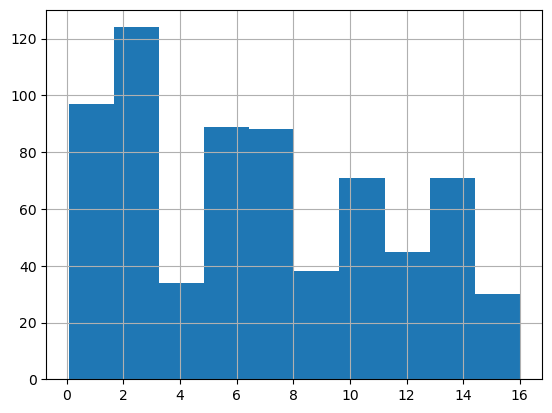

In [13]:
import matplotlib.pyplot as plt

df[df['work_type'] == 'children']['age'].hist()
plt.show()

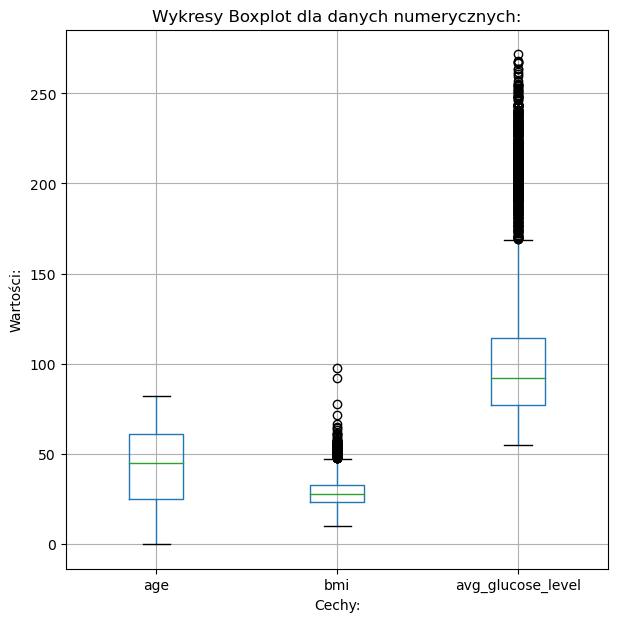

In [14]:
numeric = ['age', 'bmi', 'avg_glucose_level']
df[numeric].boxplot(figsize=(7,7))
plt.title("Wykresy Boxplot dla danych numerycznych:")
plt.xlabel("Cechy:")
plt.ylabel("Wartości:")
plt.show()

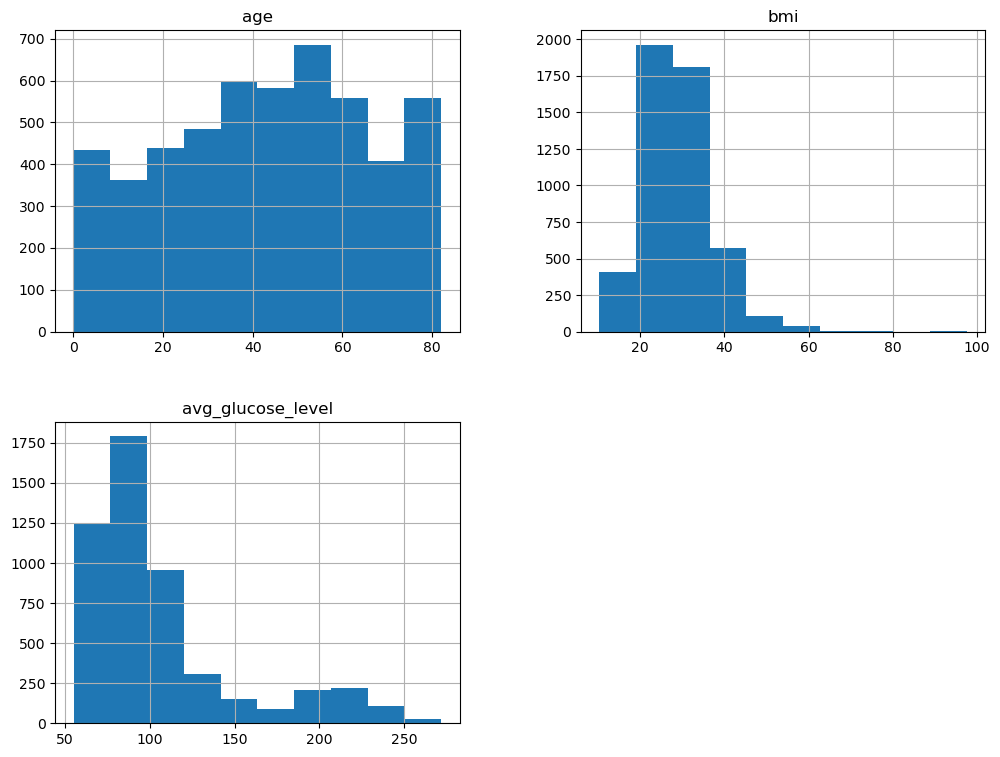

In [15]:
df[numeric].hist(figsize=(12,9))
plt.title('Histogramy dla danych numerycznych')
plt.xlabel('Nazwa kolumny')
plt.ylabel('Wartości')
plt.show()

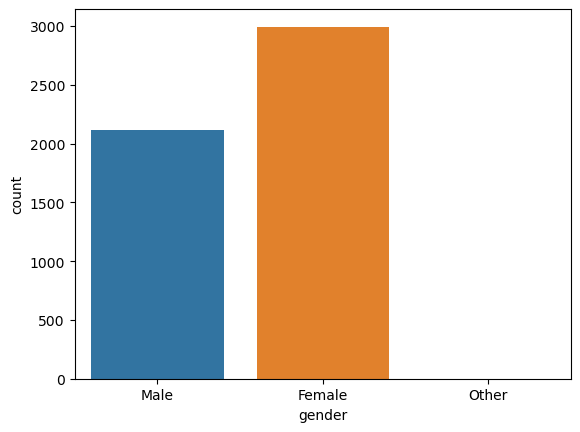

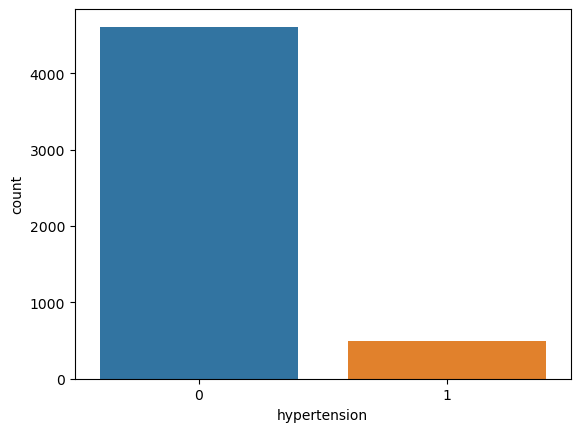

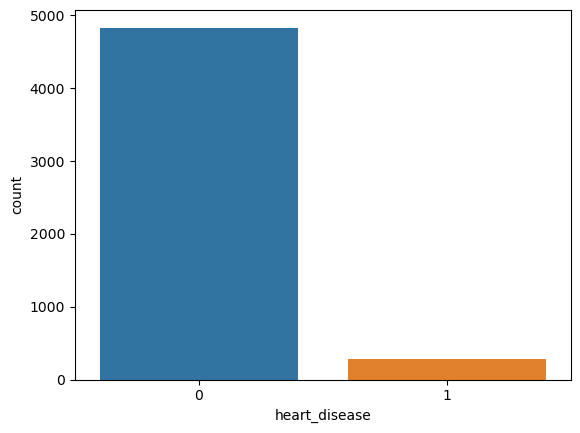

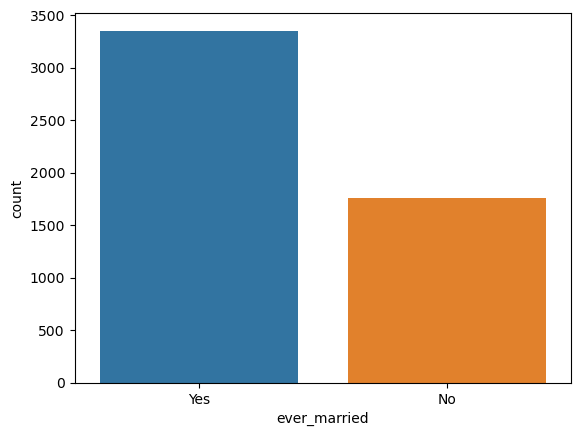

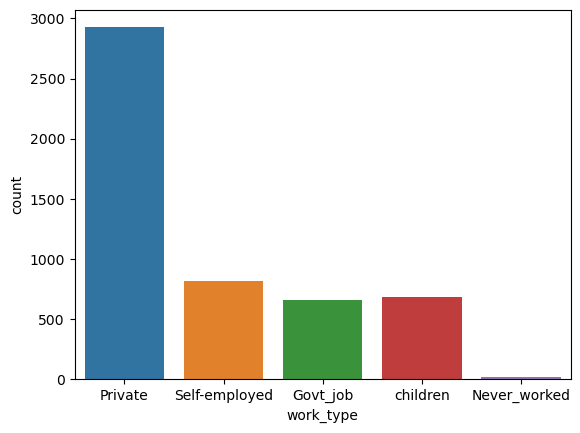

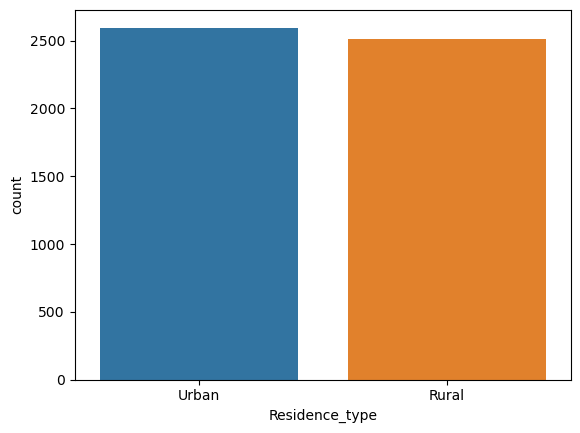

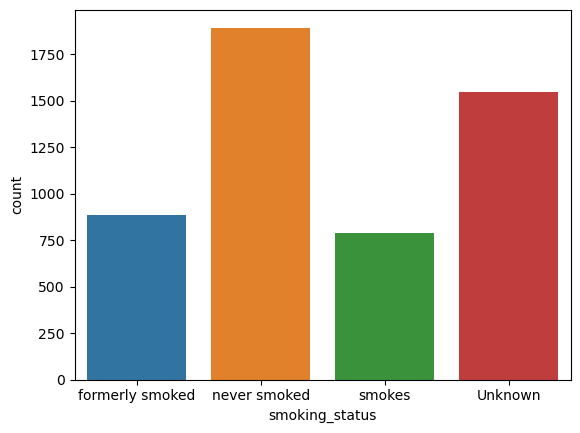

In [16]:
import seaborn as sns

sns.countplot(df, x='gender')
plt.show()

sns.countplot(df, x='hypertension')
plt.show()

sns.countplot(df, x='heart_disease')
plt.show()

sns.countplot(df, x='ever_married')
plt.show()

sns.countplot(df, x='work_type')
plt.show()

sns.countplot(df, x='Residence_type')
plt.show()

sns.countplot(df, x='smoking_status')
plt.show()

In [17]:
df[df['avg_glucose_level'] > 230]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
33,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
45,Male,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1
57,Male,78.0,0,0,Yes,Private,Urban,237.75,NaN,formerly smoked,1
76,Male,80.0,1,0,Yes,Private,Urban,240.09,27.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4855,Female,57.0,1,1,Yes,Private,Rural,231.72,45.7,formerly smoked,0
4909,Female,39.0,0,0,Yes,Private,Urban,243.52,37.2,smokes,0
4921,Male,72.0,0,1,Yes,Private,Rural,238.27,NaN,smokes,0
4983,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0


In [18]:
df_woe.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027752,0.021222,0.085683,-0.030170,-0.089857,-0.006107,0.054721,-0.024320,-0.008827,0.009080
age,-0.027752,1.000000,0.276398,0.263796,0.679125,0.666584,0.014180,0.238171,0.333223,0.385407,0.245257
hypertension,0.021222,0.276398,1.000000,0.108306,0.164243,0.145639,-0.007913,0.174474,0.163270,0.126693,0.127904
heart_disease,0.085683,0.263796,0.108306,1.000000,0.114644,0.104017,0.003092,0.161857,0.043646,0.087445,0.134914
ever_married,-0.030170,0.679125,0.164243,0.114644,1.000000,0.555312,0.006261,0.155068,0.341191,0.321805,0.108340
work_type,-0.089857,0.666584,0.145639,0.104017,0.555312,1.000000,0.003931,0.109397,0.443525,0.435955,0.091850
Residence_type,-0.006107,0.014180,-0.007913,0.003092,0.006261,0.003931,1.000000,-0.004946,-0.001580,0.009650,0.015458
avg_glucose_level,0.054721,0.238171,0.174474,0.161857,0.155068,0.109397,-0.004946,1.000000,0.183846,0.101996,0.131945
bmi,-0.024320,0.333223,0.163270,0.043646,0.341191,0.443525,-0.001580,0.183846,1.000000,0.241696,0.039209
smoking_status,-0.008827,0.385407,0.126693,0.087445,0.321805,0.435955,0.009650,0.101996,0.241696,1.000000,0.074587


Analiza korelacji w celu odkrycia potencjalnej współliniowości. Brak istotnej (spodziewanej) korelacji pomiędzy zmienną 'bmi' oraz 'avg_glucose_level'.

In [19]:
df[df['bmi'] > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


BMI > 70 jest możliwe (BMI powyżej 100 jest klasyfikowana otyłość 10 stopnia; źródło: https://odchudzanie.medicover.pl/wskaznik-bmi-stopnie-otylosci/). Zatem nie ma podstaw by usunąć wartości odstające.

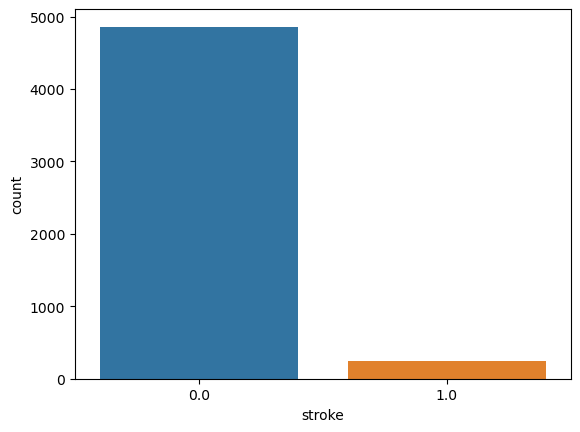

In [20]:
sns.countplot(df_woe, x='stroke')
plt.show()

Powyższy wykres obrazuje, że dane dla zmiennej celu są wyraźnie niezbalansowane.

In [21]:
# Zbalansowanie danych za pomocą SMOTE

from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x = df_woe[df_woe.columns.difference(['stroke'])]
y = df_woe['stroke']

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 4861, 1.0: 249})
Resample dataset shape Counter({1.0: 4861, 0.0: 4861})


## Konstrukcja modeli

Modele wykorzystane w projekcie:

1. Regresja logistyczna
2. Drzewo decyzyjne
3. AdaBoost
4. Lasy Losowe

In [22]:
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import svm

In [23]:
def evaluate_model(model, X_train, X_test, y_train, y_test):    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    return y_pred_test, {
        "Accuracy_train":  sklearn.metrics.accuracy_score(y_pred_train, y_train),
        "Accuracy_test": sklearn.metrics.accuracy_score(y_pred_test, y_test),
        "Precision_train":    sklearn.metrics.precision_score(y_pred_train, y_train),
        "Precision_test":   sklearn.metrics.precision_score(y_pred_test, y_test),
        "Recall_train":    sklearn.metrics.recall_score(y_pred_train, y_train),
        "Recall_test":   sklearn.metrics.recall_score(y_pred_test, y_test),
        "F1_score_train":   sklearn.metrics.f1_score(y_pred_train, y_train),
        "F1_score_test":  sklearn.metrics.f1_score(y_pred_test, y_test),
        "AUC_train":   sklearn.metrics.roc_auc_score(y_pred_train, y_train),
        "AUC_test":  sklearn.metrics.roc_auc_score(y_pred_test, y_test)
    }

In [24]:
# Regresja Logistyczna

LogReg = LogisticRegression()

X = x_smote
Y = y_smote
idx_train, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
    
X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
Y_train, Y_test = Y[idx_train], Y[idx_test]

y_pred_test, result_LogReg = evaluate_model(LogReg, X_train, X_test, Y_train, Y_test)

C:\Users\almak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
result_LogReg

{'Accuracy_train': 0.7731773177317732,
 'Accuracy_test': 0.7681233933161954,
 'Precision_train': 0.8038659793814433,
 'Precision_test': 0.7981651376146789,
 'Recall_train': 0.7566715186802523,
 'Recall_test': 0.7557915057915058,
 'F1_score_train': 0.7795551112221945,
 'F1_score_test': 0.7764005949429846,
 'AUC_train': 0.7742317921718636,
 'AUC_test': 0.768984861806644}

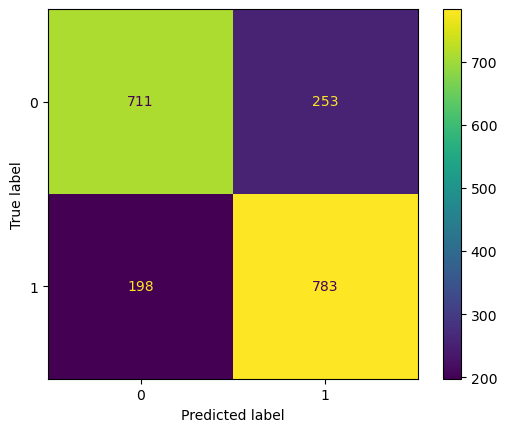

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_pred_test, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Model regresji logistycznej nie daje satysfakcjonujących wyników (wartości min. > 0.8) zarówno na zbiorze treningowym jak i testowym. Ponadto zwraca znaczącą dysproporcję wyników FP i FN. Może to oznaczać, że dane nie są liniowo separowalne, tak jak zakłada model regresji logistycznej.

In [27]:
# Drzewo Decyzyjne

DecTre = DecisionTreeClassifier()

X = x_smote
Y = y_smote
idx_train, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
    
X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
Y_train, Y_test = Y[idx_train], Y[idx_test]

y_pred_test, result_DecTre = evaluate_model(DecTre, X_train, X_test, Y_train, Y_test)

result_DecTre

{'Accuracy_train': 1.0,
 'Accuracy_test': 0.9485861182519281,
 'Precision_train': 1.0,
 'Precision_test': 0.9602446483180428,
 'Recall_train': 1.0,
 'Recall_test': 0.9391824526420738,
 'F1_score_train': 1.0,
 'F1_score_test': 0.9495967741935485,
 'AUC_train': 1.0,
 'AUC_test': 0.9488905893783617}

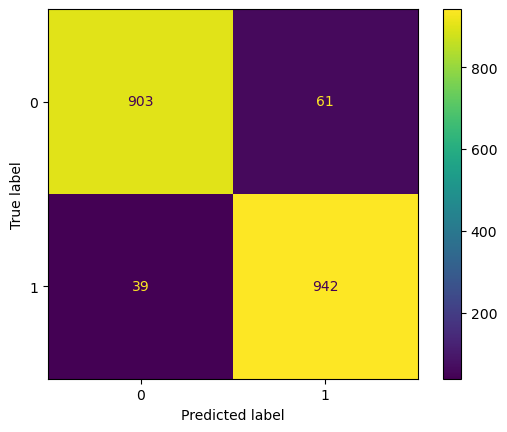

In [28]:
cm = confusion_matrix(Y_test, y_pred_test, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Model drzewa decyzyjnego daje bardzo dobre wyniki na zbiorze testowym (pow. > 0.93). Zwraca znacznie lepsze proporcje FP i FN w stosunku do regresji logistycznej. Drzewo zakłada nieliniową klasyfikację i lepiej niż regresja logistyczna sprawuje się w przypadku przewidywania udaru.

In [29]:
# AdaBoost

Ada = AdaBoostClassifier()

X = x_smote
Y = y_smote
idx_train, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
    
X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
Y_train, Y_test = Y[idx_train], Y[idx_test]

y_pred_test, result_Ada = evaluate_model(Ada, X_train, X_test, Y_train, Y_test)

result_Ada

{'Accuracy_train': 0.9618104667609618,
 'Accuracy_test': 0.9573264781491002,
 'Precision_train': 0.9327319587628866,
 'Precision_test': 0.928644240570846,
 'Recall_train': 0.9901504787961696,
 'Recall_test': 0.9859307359307359,
 'F1_score_train': 0.9605839416058395,
 'F1_score_test': 0.9564304461942258,
 'AUC_train': 0.9634158507517967,
 'AUC_test': 0.9586852504335365}

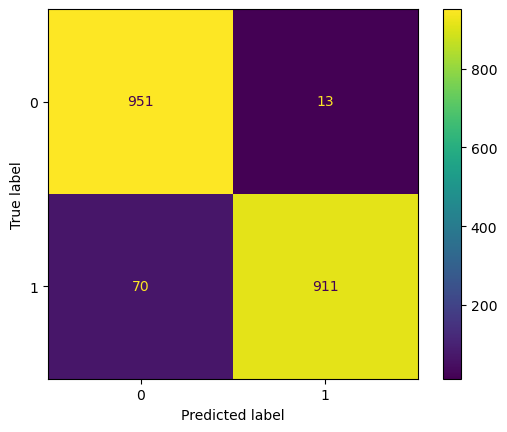

In [30]:
cm = confusion_matrix(Y_test, y_pred_test, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Model AdaBoost daje bardzo dobre wyniki na zbiorze testowym (pow. > 0.91). Dodatkowo sprawdza się lepiej w przewidywaniu wyników prawdziwie negatywnych (TN).

In [31]:
# Lasy Losowe

RanFor = RandomForestClassifier()

X = x_smote
Y = y_smote
idx_train, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
    
X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
Y_train, Y_test = Y[idx_train], Y[idx_test]

y_pred_test, result_RanFor = evaluate_model(RanFor, X_train, X_test, Y_train, Y_test)

result_RanFor

{'Accuracy_train': 1.0,
 'Accuracy_test': 0.9701799485861182,
 'Precision_train': 1.0,
 'Precision_test': 0.9520897043832823,
 'Recall_train': 1.0,
 'Recall_test': 0.9883597883597883,
 'F1_score_train': 1.0,
 'F1_score_test': 0.9698857736240913,
 'AUC_train': 1.0,
 'AUC_test': 0.9706798941798941}

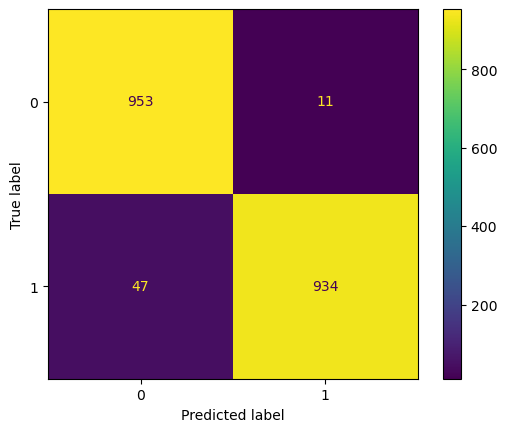

In [32]:
cm = confusion_matrix(Y_test, y_pred_test, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Lasy losowe mają największą moc predykcyjną (wyniki pow. > 0.95 na zbiorze testowym).

### Wnioski

1. Problem braków danych został rozwiązany przy pomocy KNN Imputera, tzn. algorytmu K-najbliższych sąsiadów zakładającego że wartości, które są blisko siebie, są do siebie podobne.
2. Wartości odstające nie zostały usunięte, ponieważ są to realne wyniki dla BMI czy średniego poziomu glukozy we krwi. 
3. Większość pacjentów miała BMI pomiędzy 20 a 40 oraz poziom glukozy między 75 a 100. 
4. Przeważająca większość nie miała nadciśnienia ani chorób serca. Zmienna, która najsilniej korelowała z udarem to wiek (r=.25, niska korelacja). 
5. Dane dla zmiennej celu (stroke) były niezbalansowane, co udało się rozwiązać za pomocą metody SMOTE.
6. Porównano 4 modele: regresji logistyczne, drzewa decyzyjnego, AdaBoost oraz lasów losowych. Model lasów losowych osiągnął najlepsze wyniki zarówno na zbiorze treningowym, jak i testowym (acc. 1.0/.96, prec. 1.0/.95, rec. 1/.99, F1 1.0/.96, AUC 1.0/.97)
